**Plotting ROC Curves**

Let’s now build a binary classifier and plot it’s ROC curve to better understand the process.

We will use a Logistic Regression model for this example. We’re working with three important libraries here – Matplotlib, Numpy, and sklearn.

In [6]:
#Importing Required Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [7]:
##Creating a Dataset
X, label = make_classification(n_samples=500, n_classes=2, weights=[1,1], random_state=100)

In [8]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=1)

In [9]:
#Creating the class object and 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#predict probabilities
probs = model.predict_proba(X_test)

In [12]:
#Keeping only positive class
probs = probs[:, 1]

In [13]:
#Calculating the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, probs)

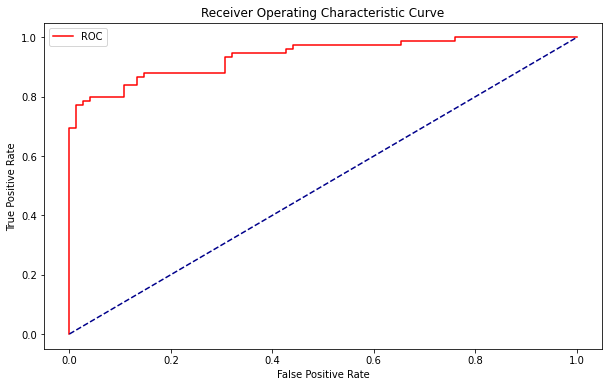

In [14]:
#Plotting the figure
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()